In [15]:
import numpy as np
import rioxarray as rxr
import xarray as xr

import matplotlib.pyplot as plt

In [11]:
# Using forest elephant as an example species here
#   reading in the four needed rasters: (1) human-absent AOH, (2) current AOH, (3 + 4) hunting pressure maps
human_absent_aoh = rxr.open_rasterio('/Users/emiliolr/Desktop/elephant_example/181007989_RESIDENT_hum_abs.tif')
human_absent_hp = rxr.open_rasterio('/Users/emiliolr/Desktop/elephant_example/181007989_hunting_pred_rf-pca_hum_abs.tif')

current_aoh = rxr.open_rasterio('/Users/emiliolr/Desktop/elephant_example/181007989_RESIDENT_cur.tif')
current_hp = rxr.open_rasterio('/Users/emiliolr/Desktop/elephant_example/181007989_hunting_pred_rf-pca_cur.tif')

#  ensure hunting pressure maps align precisely w/respective AOHs
human_absent_hp = human_absent_hp.rio.reproject_match(human_absent_aoh)
current_hp = current_hp.rio.reproject_match(current_aoh)

#  putting RR=1 (no hunting effect) in AOH areas with no predictions for hunting maps
no_pred_mask = ((human_absent_aoh != 0) & (xr.ufuncs.isnan(human_absent_hp)))
human_absent_hp = human_absent_hp.where(~no_pred_mask, other = 1)

no_pred_mask = ((current_aoh != 0) & (xr.ufuncs.isnan(current_hp)))
current_hp = current_hp.where(~no_pred_mask, other = 1)

#  getting current AOH w/density modified by hunting
current_aoh_w_hunting = current_aoh * current_hp

In [29]:
# Looking at the effect of jointly restoring + abating hunting pressure
current_aoh_w_hunting = current_aoh_w_hunting.rio.reproject_match(human_absent_aoh)

#  making sure that when we take the difference, comparisons are made everywhere (doesn't
#   happen if one has null values but not the other)
human_absent_aoh = human_absent_aoh.fillna(0)
current_aoh_w_hunting = current_aoh_w_hunting.fillna(0)

#  the delta AOH in each pixel
delta_aoh_tot = human_absent_aoh - current_aoh_w_hunting

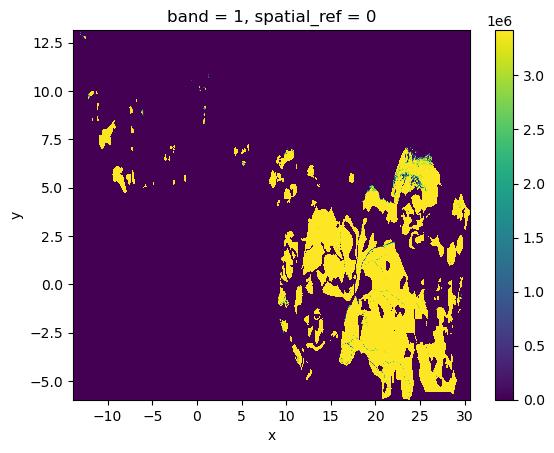

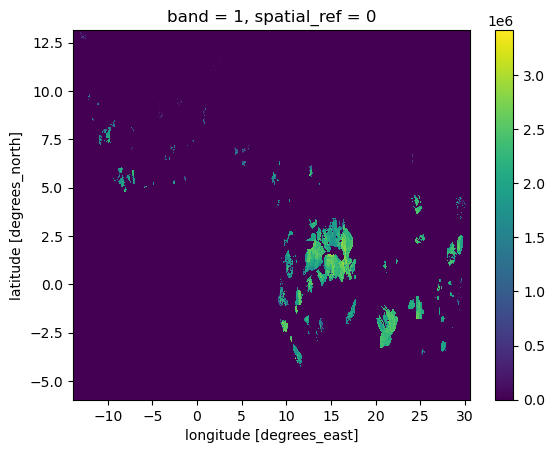

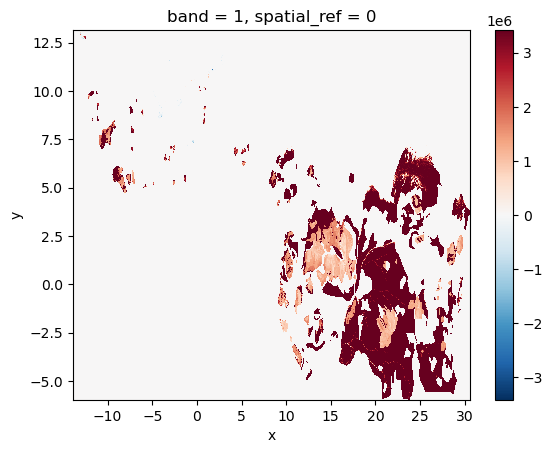

In [30]:
human_absent_aoh.plot()
plt.show()

current_aoh_w_hunting.plot()
plt.show()

delta_aoh_tot.plot()
plt.show()